## 1. importing necessary libraries

In [2]:
import pandas as pd
import numpy as np #to deal with arrays 
import seaborn as sns #for charts and visualization
import matplotlib.pyplot as plt

## 2. Uploading dataset

In [4]:
irisData= pd.read_csv(r'D:\round3_p2\Data science practical\tasks\Iris.csv')
#uplaoding dataset from my device
pd.read_csv(r'D:\round3_p2\Data science practical\tasks\Iris.csv')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica


## 3. overview about dataset

In [6]:
irisData.shape #(n_rows, n_columns)

(149, 6)

In [7]:
irisData.head() #display first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
irisData.tail() #display last 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
irisData.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
144  145            6.7           3.3            5.7           2.5   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

## 4. make a copy from dataset "Iris" named "temp"

In [11]:
temp=irisData.drop('Id',axis=1)
#drop Id column as is not necessary so it can confuse the model while training
print(temp)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
144            6.7           3.3            5.7           2.5  Iris-virginica
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica

[149 rows x 5 columns]


## 5. cleaning data (fast clean as it not required in the homework text)

In [13]:
#checking for missing values
missing = temp.isnull().sum() # رح يجمعلي عدد ال null الموجودة في العمود
print(f'missing: {missing}\n')
#Checking for duplicates
duplicates = temp.duplicated().sum()
print(f"\n duplicates: {duplicates}")

missing: SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


 duplicates: 3


### Removing duplicates

In [15]:
if duplicates > 0:
    temp = temp.drop_duplicates()
    print("duplicated rows has been deleted successfully")
else:
    print("no duplicated rows found")

duplicated rows has been deleted successfully


## Dataset exploration

### Correlation between attributes in the dataset

<Axes: >

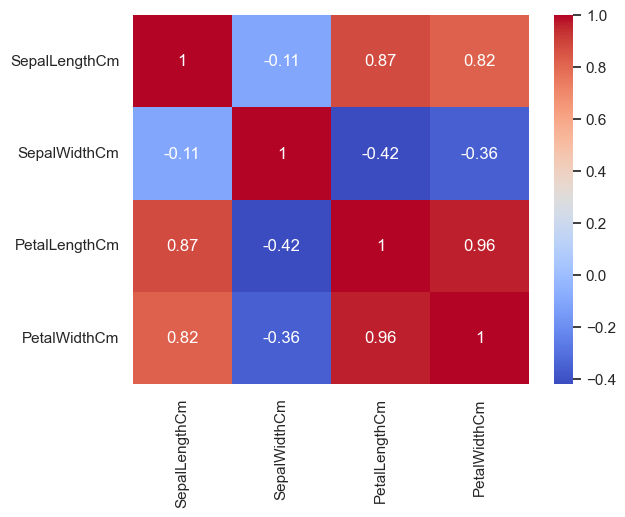

In [77]:
cor = temp.select_dtypes(include='number').corr() #  only numeric data can be shown 
sns.heatmap(cor, annot=True, cmap='coolwarm')

## 6. Modelling

## encoding non-numeric data (Species column)

In [20]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#temp['Species'] = le.fit_transform(temp['Species'])

### 6.1 Spliting data into training and testing groups

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = temp.drop("Species", axis=1).values # numeric values
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.

In [24]:
y = temp["Species"] #text -classyfing- values
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Species, Length: 146, dtype: object


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#test size =20%, training sie = 80% from the dataset

### 6.2 start modelling

#### Import KNN library

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors كتبتها في متغير لحالهافي حال بدي اغيرها
knn.fit(X_train, y_train) #fitting data into knn model
y_pred = knn.predict(X_test)

#### show model result (predicting)

In [31]:
new_data = np.array([20,70,22,2.0]).reshape(1,-1)
print(new_data)

[[20. 70. 22.  2.]]


#### show distance between new_data and other values

In [33]:
distance = knn.kneighbors(new_data,4)
print(distance)
#عرض المسافة بين اقرب 4 جيران

(array([[69.08118412, 69.46841009, 69.85649576, 69.87216899]]), array([[ 45,  89, 103,   2]], dtype=int64))


### Display new_data for any group belong (Species)

In [35]:
predict=knn.predict(new_data)
print (predict)

['Iris-virginica']


## acuuercy of the model

In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


## Visiualization

### 1. pairplot of Iris Dataset colored by Species

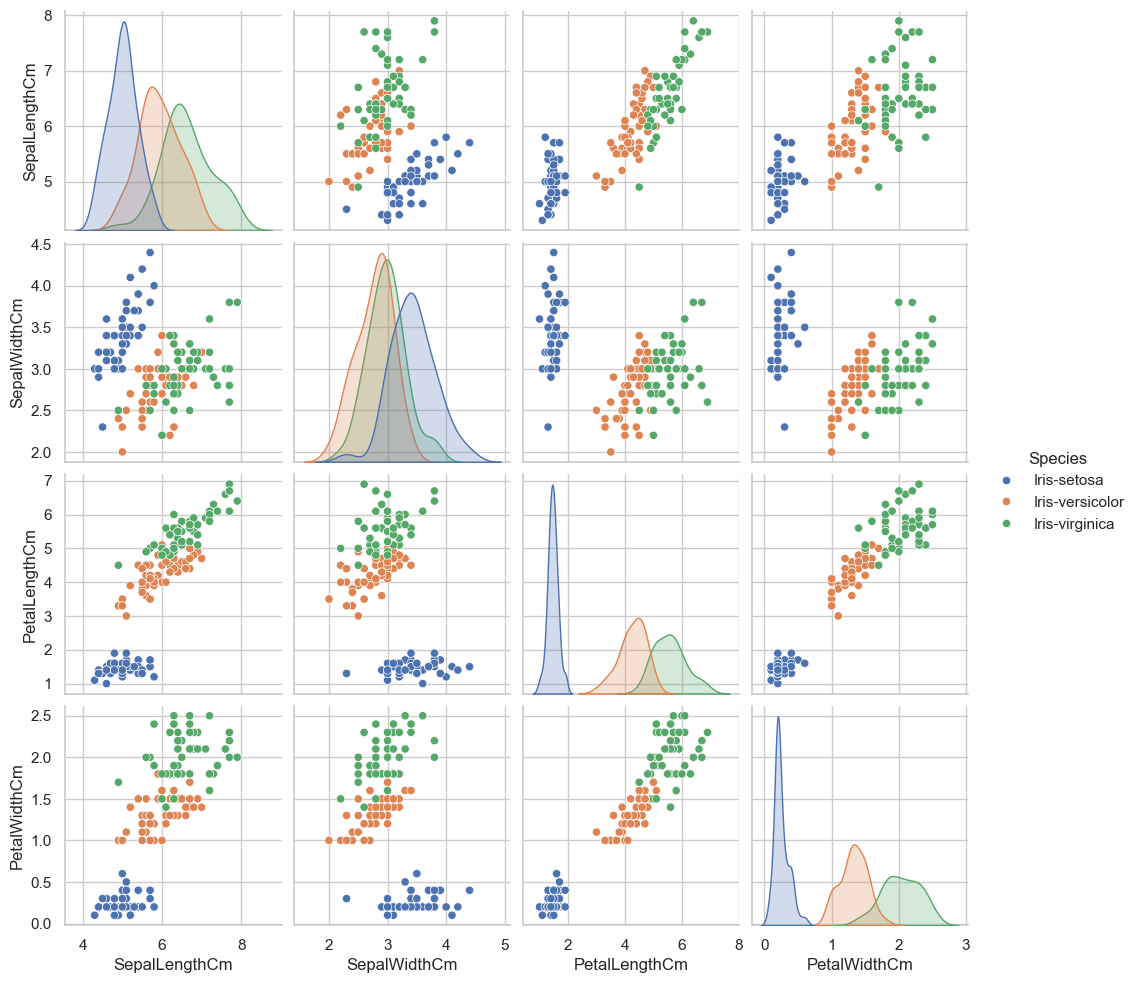

In [40]:
sns.pairplot(temp, hue='Species') # يعني اجعل التمييز وفق السبيسز
plt.show()
#التقسيم بناء على النوع Speices

### Petal length distribution Across Iris species

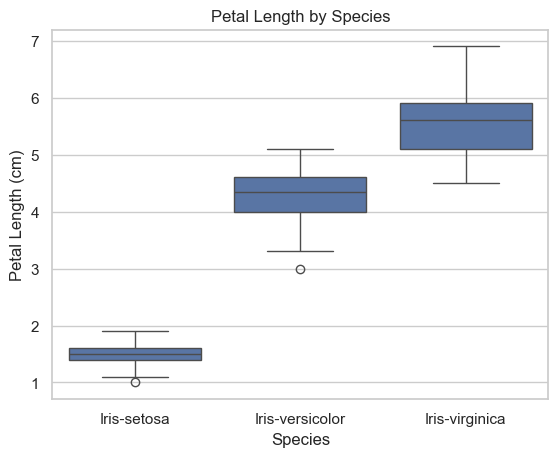

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Species', y='PetalLengthCm', data=temp)
plt.title("Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()


### Bar plot display count of each Iris Species in the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

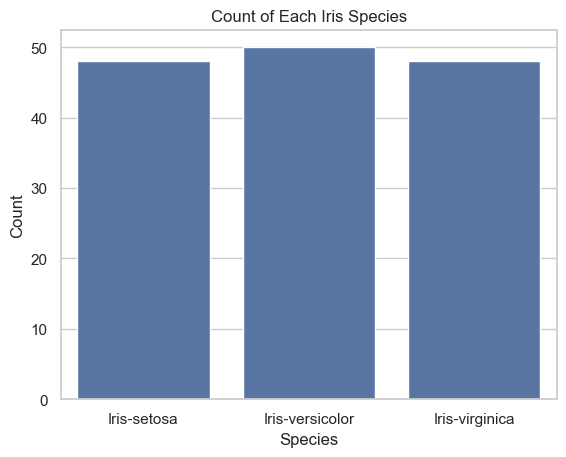

In [44]:
sns.countplot(x='Species', data=temp)
plt.title("Count of Each Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show

### Correlation between attributes in the dataset

<Axes: >

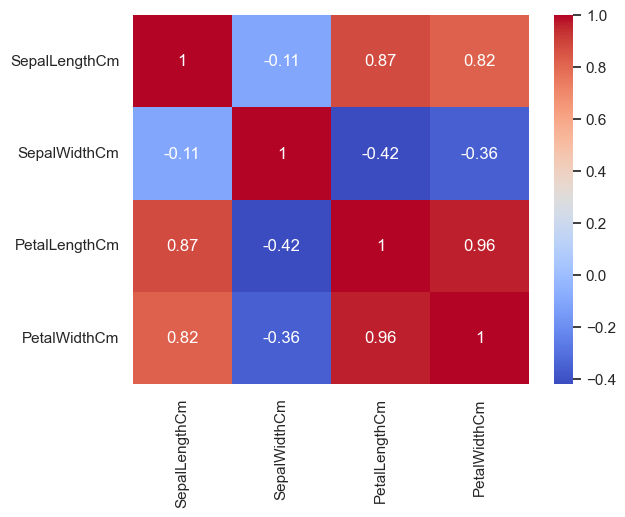

In [46]:
cor = temp.select_dtypes(include='number').corr() #  only numeric data can be shown 
sns.heatmap(cor, annot=True, cmap='coolwarm')